# Introduction aux réseaux de neurones convolutifs

## Load data

In [63]:
import keras
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
from sklearn.model_selection import train_test_split

# Download data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

## Some images from the dataset

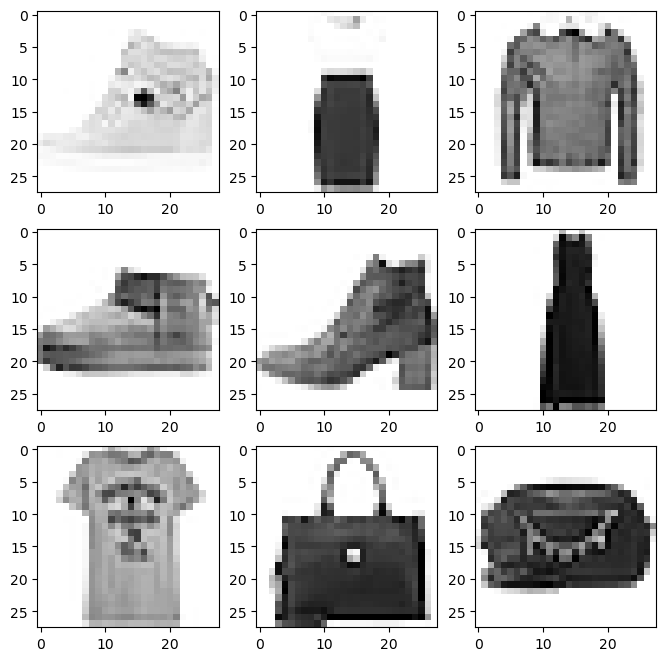

In [90]:
import random
ids = random.sample([i for i in range(X_train.shape[0])],9)
fig, axes = plt.subplots(3,3, figsize=(8,8))
for i, id in enumerate(ids):
    line = i%3
    col = i//3
    axes[line, col].imshow(X_train[id], cmap='Greys')

## Building models

### Simple Neural Network

In [91]:
from tensorflow.keras.utils import to_categorical

# Flatten
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Vectorize target
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### First version

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

dim_size = X_train.shape[1]

model = Sequential()
model.add(Dense(10, input_dim=dim_size, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7396 - loss: 0.7547 - val_accuracy: 0.8147 - val_loss: 0.5131
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8281 - loss: 0.4903 - val_accuracy: 0.8372 - val_loss: 0.4564
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8426 - loss: 0.4498 - val_accuracy: 0.8415 - val_loss: 0.4551
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8483 - loss: 0.4304 - val_accuracy: 0.8430 - val_loss: 0.4337
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8529 - loss: 0.4168 - val_accuracy: 0.8452 - val_loss: 0.4162
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8563 - loss: 0.4071 - val_accuracy: 0.8498 - val_loss: 0.4151
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8590 - loss: 0.3986 - val_accuracy: 0.8430 - val_loss: 0.4287
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8608 - loss: 0.3936 - 

In [94]:
_, test_acc = model.evaluate(X_test, y_test)
print(test_acc)
model_to_acc = {
    "NN_2_Dense_Layers": test_acc
}

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.4300
0.8532999753952026


In [96]:
model_to_acc

{'NN_2_Dense_Layers': 0.8532999753952026}

#### Wider network

In [95]:
model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8104 - loss: 0.5422 - val_accuracy: 0.8382 - val_loss: 0.4592
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8571 - loss: 0.4097 - val_accuracy: 0.8492 - val_loss: 0.4296
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8682 - loss: 0.3706 - val_accuracy: 0.8717 - val_loss: 0.3720
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8766 - loss: 0.3467 - val_accuracy: 0.8675 - val_loss: 0.3638
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8819 - loss: 0.3310 - val_accuracy: 0.8747 - val_loss: 0.3463
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8869 - loss: 0.3154 - val_accuracy: 0.8722 - val_loss: 0.3671
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8913 - loss: 0.3016 - val_accuracy: 0.8800 - val_loss: 0.3418
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8943 - loss: 0.2925 - 

In [98]:
_, test_acc = model2.evaluate(X_test, y_test)
print(test_acc)

model_to_acc["NN_2_Dense_Layers_Wider"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8729 - loss: 0.3789
0.8729000091552734


### Convolutional Neural Network

In [101]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

# Reload the data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train[:,:,:,np.newaxis] / 255.0
X_test = X_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras import Input

model4 = Sequential()
model4.add(Input(shape=(784)))
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/julien.dubois@Digital-Grenoble.local/anaconda3/envs/ML5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model4.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7849 - loss: 0.6411 - val_accuracy: 0.8340 - val_loss: 0.4671
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8454 - loss: 0.4355 - val_accuracy: 0.8547 - val_loss: 0.4007
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8660 - loss: 0.3783 - val_accuracy: 0.8788 - val_loss: 0.3420
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8818 - loss: 0.3333 - val_accuracy: 0.8802 - val_loss: 0.3347
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8936 - loss: 0.3001 - val_accuracy: 0.8807 - val_loss: 0.3177
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9003 - loss: 0.2799 - val_accuracy: 0.8905 - val_loss: 0.3035
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9061 - loss: 0.2622 - val_accuracy: 0.9022 - val_loss: 0.2809
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9119 -

In [110]:
_, test_acc = model4.evaluate(X_test, y_test)
print(test_acc)
model_to_acc["CNN_Conv2D_MaxPooling_Dense"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8997 - loss: 0.2828
0.8996999859809875


#### Improve the CNN

In [105]:
from keras import Input

model5 = Sequential()
model5.add(Input(shape=(28,28,1)))
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
model5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,138 (188.04 KB)

 Trainable params: 48,138 (188.04 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model5.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8361 - loss: 0.4577 - val_accuracy: 0.8797 - val_loss: 0.3366
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8889 - loss: 0.3164 - val_accuracy: 0.8977 - val_loss: 0.2925
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9016 - loss: 0.2771 - val_accuracy: 0.8998 - val_loss: 0.2777
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9108 - loss: 0.2498 - val_accuracy: 0.9040 - val_loss: 0.2684
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9176 - loss: 0.2289 - val_accuracy: 0.9105 - val_loss: 0.2468
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9254 - loss: 0.2096 - val_accuracy: 0.9093 - val_loss: 0.2583
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9295 - loss: 0.1953 - val_accuracy: 0.9088 - val_loss: 0.2535
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9349 -

In [109]:
_, test_acc = model5.evaluate(X_test, y_test)
print(test_acc)
model_to_acc["CNN_Conv2D_MaxPooling_x2_Dense"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9111 - loss: 0.2634
0.9110999703407288


In [111]:
model_to_acc

{'NN_2_Dense_Layers': 0.8532999753952026,
 'NN_2_Dense_Layers_Wider': 0.8729000091552734,
 'CNN_Conv2D_MaxPooling_Dense': 0.8996999859809875,
 'CNN_Conv2D_MaxPooling_x2_Dense': 0.9110999703407288}

In [ ]:
from keras import Input

model6 = Sequential()
model6.add(Input(shape=(28,28,1)))
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(10, activation='relu'))
model6.add(Dense(10, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history6 = model6.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7155 - loss: 0.8377 - val_accuracy: 0.7827 - val_loss: 0.5557
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8180 - loss: 0.4707 - val_accuracy: 0.8333 - val_loss: 0.4504
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8572 - loss: 0.3916 - val_accuracy: 0.8657 - val_loss: 0.3705
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8778 - loss: 0.3427 - val_accuracy: 0.8792 - val_loss: 0.3432
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8926 - loss: 0.3027 - val_accuracy: 0.8912 - val_loss: 0.3118
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9006 - loss: 0.2769 - val_accuracy: 0.8963 - val_loss: 0.2884
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9074 - loss: 0.2574 - val_accuracy: 0.8990 - val_loss: 0.2873
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9131 -

In [ ]:
_, test_acc = model6.evaluate(X_test, y_test)
print(test_acc)
model_to_acc["CNN_Conv2D_MaxPooling_x2_Dense_x2"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9047 - loss: 0.2765
0.904699981212616


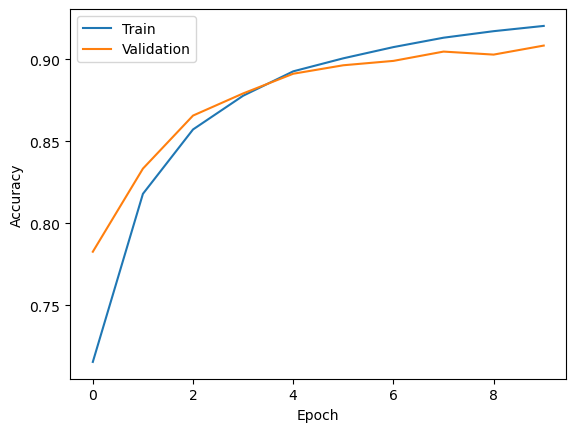

In [123]:
plt.plot(history6.history["accuracy"], label="Train")
plt.plot(history6.history["val_accuracy"], label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [117]:
model_to_acc

{'NN_2_Dense_Layers': 0.8532999753952026,
 'NN_2_Dense_Layers_Wider': 0.8729000091552734,
 'CNN_Conv2D_MaxPooling_Dense': 0.8996999859809875,
 'CNN_Conv2D_MaxPooling_x2_Dense': 0.9110999703407288,
 'CNN_Conv2D_MaxPooling_x2_Dense_x2': 0.904699981212616}

In [119]:
from keras import Input

model7 = Sequential()
model7.add(Input(shape=(28,28,1)))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(10, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
history7 = model7.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - accuracy: 0.8530 - loss: 0.4109 - val_accuracy: 0.8840 - val_loss: 0.3207
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.9044 - loss: 0.2656 - val_accuracy: 0.9067 - val_loss: 0.2501
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 40ms/step - accuracy: 0.9190 - loss: 0.2245 - val_accuracy: 0.9125 - val_loss: 0.2425
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 40ms/step - accuracy: 0.9281 - loss: 0.1983 - val_accuracy: 0.9202 - val_loss: 0.2199
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.9354 - loss: 0.1781 - val_accuracy: 0.9215 - val_loss: 0.2199
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 38ms/step - accuracy: 0.9408 - loss: 0.1600 - val_accuracy: 0.9227 - val_loss: 0.2213
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.9481 - loss: 0.1432 - val_accuracy: 0.9190 - val_loss: 0.2402
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 41ms/step - accuracy: 0.9525 -

In [121]:
_, test_acc = model7.evaluate(X_test, y_test)
print(test_acc)
model_to_acc["CNN_Conv2D_Conv2D_MaxPooling_x2_Dense"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9183 - loss: 0.2636
0.9182999730110168


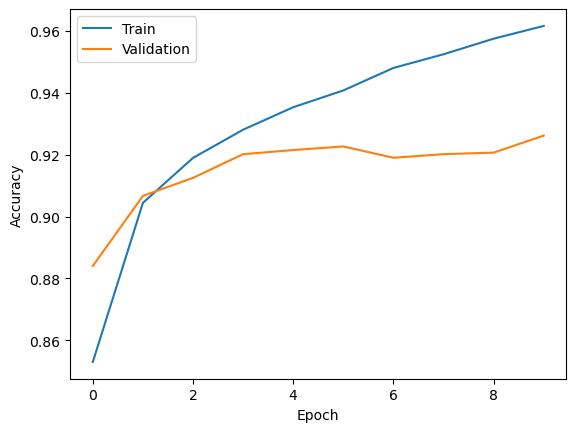

In [122]:
plt.plot(history7.history["accuracy"], label="Train")
plt.plot(history7.history["val_accuracy"], label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [140]:
from keras import Input
from keras.layers import Dropout

model8 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'), 
    MaxPooling2D(pool_size=2),
    Dropout(0.05),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'), 
    MaxPooling2D(pool_size=2),
    Dropout(0.05),
    Flatten(),
    Dense(49, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
history8 = model8.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 44ms/step - accuracy: 0.8177 - loss: 0.5020 - val_accuracy: 0.8838 - val_loss: 0.3082
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.8830 - loss: 0.3250 - val_accuracy: 0.9017 - val_loss: 0.2694
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9012 - loss: 0.2747 - val_accuracy: 0.9132 - val_loss: 0.2312
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.9107 - loss: 0.2450 - val_accuracy: 0.9140 - val_loss: 0.2234
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9186 - loss: 0.2242 - val_accuracy: 0.9230 - val_loss: 0.2139
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9262 - loss: 0.2001 - val_accuracy: 0.9173 - val_loss: 0.2128
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 75s 44ms/step - accuracy: 0.9293 - loss: 0.1891 - val_accuracy: 0.9210 - val_loss: 0.2181
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 77s 45ms/step - accuracy: 0.9347 -

In [142]:
_, test_acc = model8.evaluate(X_test, y_test)
print(test_acc)
model_to_acc["CNN_Conv2D_Conv2D_MaxPooling_Dropout_x2_Dropout_Dense_"] = test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9196 - loss: 0.2409
0.9196000099182129


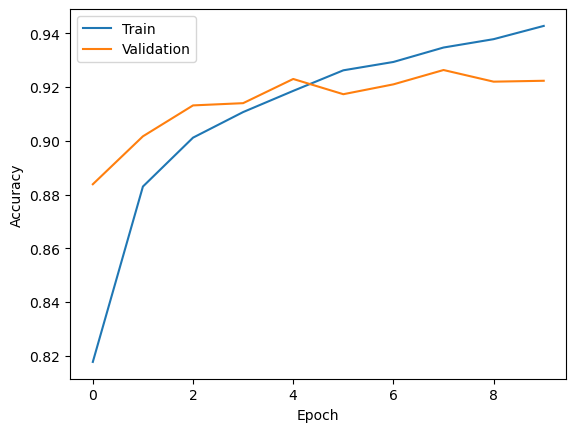

In [143]:
plt.plot(history8.history["accuracy"], label="Train")
plt.plot(history8.history["val_accuracy"], label="Validation")
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [144]:
model_to_acc

{'NN_2_Dense_Layers': 0.8532999753952026,
 'NN_2_Dense_Layers_Wider': 0.8729000091552734,
 'CNN_Conv2D_MaxPooling_Dense': 0.8996999859809875,
 'CNN_Conv2D_MaxPooling_x2_Dense': 0.9110999703407288,
 'CNN_Conv2D_MaxPooling_x2_Dense_x2': 0.904699981212616,
 'CNN_Conv2D_Conv2D_MaxPooling_x2_Dense': 0.9182999730110168,
 'CNN_Conv2D_Conv2D_MaxPooling_Dropout_x2_Dropout_Dense_': 0.9196000099182129}